In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rand = np.random.RandomState(42)

# Создание случайного набора двумерного массива из 10 точек
X = rand.rand(10, 2)

In [2]:
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

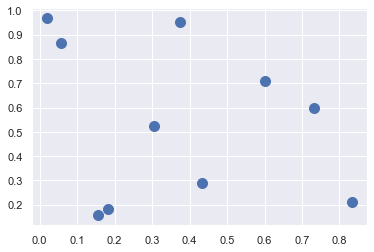

In [3]:
# Визуализируем расположение этих точек с помощью диаграммы рассеяния
plt.scatter(X[:, 0], X[:, 1], s=100)

Квадрат расстояния между двумя точками равен сумме квадратов расстояний между ними по каждой из координат. Воспользуемся возможностями эффективного транслирования и аггрегирования библиотеки NumPy и вычислим матрицу квадратов расстояний.

In [4]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [5]:
# Проверим, что диагональ матрицы состоит из нулей (т.е. набор расстояний между каждой точкой и ей самой)
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Воспользуемся функцией np.argsort для сортировки по каждой строке. Крайние слева столбцы будут представлять собой индексы ближайших соседей.

In [6]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


Вычислим два ближайших соседа с помощью функции np.argpatition. Функция возвращает массив с К наименьшими значениями слева от точки разбиения.

In [7]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[3 0 4 5 8 9 1 7 2 6]
 [1 4 6 9 3 5 2 7 8 0]
 [2 7 9 8 6 4 5 1 3 0]
 [3 5 0 8 4 1 6 7 2 9]
 [1 4 0 8 9 6 2 7 5 3]
 [5 3 0 8 4 1 6 7 2 9]
 [1 9 6 4 3 5 2 7 8 0]
 [7 2 9 8 6 4 5 1 3 0]
 [8 9 4 7 2 3 0 1 5 6]
 [8 7 9 2 1 6 4 5 3 0]]


Визуализируем сетку соседей, выведем на диаграмму точки вдоль линий, связывающую каждую точку с ее ближайшими двумя соседями.

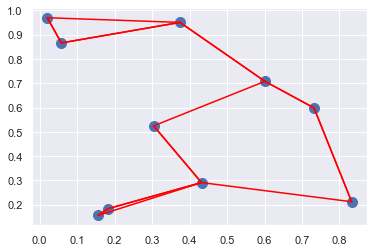

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=100)

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='red')

Примечание. Пояснение по синтаксису операции dist_sq.

In [9]:
# Для каждой пары точек вычисляем разности их координат
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [10]:
differences

array([[[ 0.        ,  0.        ],
        [-0.35745382,  0.35205582],
        [ 0.21852148,  0.79471979],
        [ 0.31645651,  0.08453816],
        [-0.22657489,  0.24264173],
        [ 0.35395562, -0.01919555],
        [-0.45790252,  0.7383752 ],
        [ 0.19271515,  0.7673098 ],
        [ 0.07029788,  0.42595787],
        [-0.0574049 ,  0.65948517]],

       [[ 0.35745382, -0.35205582],
        [ 0.        ,  0.        ],
        [ 0.5759753 ,  0.44266396],
        [ 0.67391033, -0.26751766],
        [ 0.13087893, -0.10941409],
        [ 0.71140945, -0.37125137],
        [-0.1004487 ,  0.38631937],
        [ 0.55016897,  0.41525397],
        [ 0.4277517 ,  0.07390205],
        [ 0.30004892,  0.30742934]],

       [[-0.21852148, -0.79471979],
        [-0.5759753 , -0.44266396],
        [ 0.        ,  0.        ],
        [ 0.09793503, -0.71018163],
        [-0.44509637, -0.55207806],
        [ 0.13543415, -0.81391533],
        [-0.676424  , -0.05634459],
        [-0.02580633, -0

In [11]:
# Возводим разности в квадрат
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [12]:
# Суммируем квадраты разностей координат для получения квадрата расстояния
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)